In [ ]:
# do this in your bash terminal (without the "!")
# !pip install python-mnist

In [40]:
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,8)

In [41]:
# decompress the data
import gzip
filenames = 'train-images-idx3-ubyte t10k-images-idx3-ubyte train-labels-idx1-ubyte t10k-labels-idx1-ubyte'.split()

for i, filename in enumerate(filenames):
    pathin = '../shared-resources/mnist/' + filename + '.gz'
    pathout = pathin[:-3]
    with gzip.open(pathin) as fin:
        print("Reading file #{}: {}".format(i, pathin))
        with open('../shared-resources/mnist/' + filename, 'wb') as fout:
            print("Writing file #{}: {}".format(i, pathout))
            fout.write(fin.read())

Reading file #0: ../shared-resources/mnist/train-images-idx3-ubyte.gz
Writing file #0: ../shared-resources/mnist/train-images-idx3-ubyte
Reading file #1: ../shared-resources/mnist/t10k-images-idx3-ubyte.gz
Writing file #1: ../shared-resources/mnist/t10k-images-idx3-ubyte
Reading file #2: ../shared-resources/mnist/train-labels-idx1-ubyte.gz
Writing file #2: ../shared-resources/mnist/train-labels-idx1-ubyte
Reading file #3: ../shared-resources/mnist/t10k-labels-idx1-ubyte.gz
Writing file #3: ../shared-resources/mnist/t10k-labels-idx1-ubyte


In [42]:
import pandas as pd
import seaborn as sns
%matplotlib inline

In [43]:
from mnist import MNIST

mnistdb = MNIST('../shared-resources/mnist/')

training_images, training_labels = mnistdb.load_training()
# training_images = training_images[:1000]
# test_images, test_labels = mnistdb.load_testing()

In [44]:
df_train = pd.DataFrame(list(zip(training_images, training_labels)), columns=['image', 'label'])
# df_test = pd.DataFrame(list(zip(test_images, test_labels)), columns=['image', 'label'])

In [45]:
df_train.head(5)

,image,label
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9


In [46]:
print(df_train.label[0])
print(mnistdb.display(img=df_train.image[0]))

5

............................
............................
............................
............................
............................
.....................@@.....
.............@@@@@@.@@......
........@@@@@@@@@@..........
........@@@@@@..@@..........
...........@@@..............
............@...............
............@...............
.............@..............
.............@@.............
..............@@@...........
................@@..........
.................@@.........
.................@@@........
.................@@@........
..............@@@@@.........
............@@@@@@..........
..........@@@@@.............
........@@@@@...............
......@@@@@@................
.....@@@@...................
............................
............................
............................


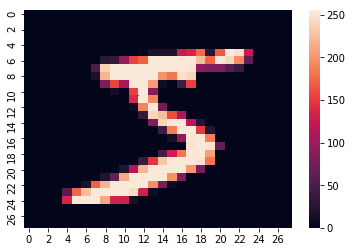

In [49]:
ax = sns.heatmap(pd.np.array(df_train.image[0]).reshape(28, 28))

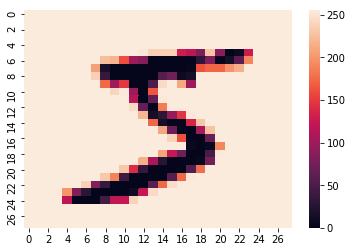

In [18]:
print(df_train.label[0])
ax = sns.heatmap(255 - pd.np.array(df_train.image[0]).reshape(28, 28))


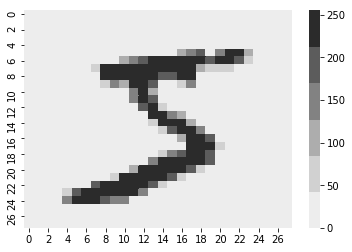

In [22]:
cmap = sns.palettes.color_palette('Greys')
ax = sns.heatmap(pd.np.array(df_train.image[0]).reshape(28, 28), cmap=cmap)

In [28]:
df_train_image = pd.DataFrame(list(df_train.image.values))
df_train_image.head(5)


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
from sklearn.decomposition import PCA
n_components = 12
pca = PCA(n_components=n_components).fit(df_train_image)
df_pca10 = pca.transform(df_train_image)

In [84]:
df_pca10 = pd.DataFrame(df_pca10)
df_pca10.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,123.932591,-312.674261,-24.514111,-555.757975,-27.296606,-232.476839,233.997559,159.820867,-363.484204,198.492075,197.561784,-253.770033
1,1011.718374,-294.857021,596.339519,-460.766036,-827.275073,-181.951882,-45.005722,-104.953911,40.490995,150.809771,-286.206282,-106.598791
2,-51.849605,392.173155,-188.509573,521.011158,-306.680101,-1.836350,-859.054303,368.610868,-114.567200,-178.800357,450.644030,-159.452470
3,-799.127039,-607.197226,273.651230,105.878320,-1.853658,699.655897,-473.716441,-67.358793,302.704112,11.198404,-432.492809,-175.459349
4,-382.754942,730.542870,16.353840,-241.697527,98.161479,43.229286,-91.667547,-405.565084,225.483082,103.997258,-347.691267,459.352887


In [85]:
df_pca10.corr()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000e+00,1.747219e-15,6.892313e-14,-8.039141e-14,2.392022e-13,-4.411654e-13,-1.368421e-12,6.194597e-12,-6.750487e-13,-3.886982e-11,1.331211e-11,-4.958512e-11
1,1.747219e-15,1.000000e+00,1.369244e-13,9.264166e-14,8.862130e-13,-2.492587e-12,1.149794e-11,2.462855e-11,2.821918e-11,-1.995635e-10,1.871326e-10,3.100300e-10
2,6.892313e-14,1.369244e-13,1.000000e+00,-2.584878e-12,1.206080e-11,-1.723669e-11,-6.574506e-11,6.365500e-12,-3.662183e-10,-2.965808e-09,1.053772e-09,-5.744287e-09
3,-8.039141e-14,9.264166e-14,-2.584878e-12,1.000000e+00,-5.387704e-12,4.588683e-12,1.080849e-10,-5.009586e-11,2.539428e-10,8.903573e-10,3.488739e-10,4.424513e-09
4,2.392022e-13,8.862130e-13,1.206080e-11,-5.387704e-12,1.000000e+00,-8.162821e-11,4.577928e-11,7.190342e-10,-1.452588e-12,-8.752066e-09,4.907289e-09,-4.284728e-09
5,-4.411654e-13,-2.492587e-12,-1.723669e-11,4.588683e-12,-8.162821e-11,1.000000e+00,-5.061733e-10,-2.154784e-09,-1.453901e-09,1.681382e-08,-1.286366e-08,-1.154978e-08
6,-1.368421e-12,1.149794e-11,-6.574506e-11,1.080849e-10,4.577928e-11,-5.061733e-10,1.000000e+00,7.565608e-09,1.796884e-08,-1.081635e-08,5.457815e-08,2.504500e-07
7,6.194597e-12,2.462855e-11,6.365500e-12,-5.009586e-11,7.190342e-10,-2.154784e-09,7.565608e-09,1.000000e+00,3.838110e-08,-1.006400e-07,1.125976e-07,3.937096e-07
8,-6.750487e-13,2.821918e-11,-3.662183e-10,2.539428e-10,-1.452588e-12,-1.453901e-09,1.796884e-08,3.838110e-08,1.000000e+00,6.711339e-08,1.116546e-07,9.343381e-07
9,-3.886982e-11,-1.995635e-10,-2.965808e-09,8.903573e-10,-8.752066e-09,1.681382e-08,-1.081635e-08,-1.006400e-07,6.711339e-08,1.000000e+00,-1.155257e-06,1.430831e-06


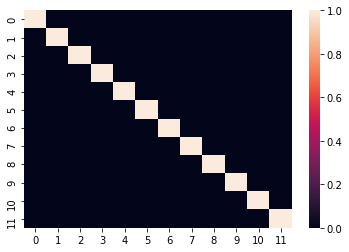

In [86]:
ax = sns.heatmap(df_pca10.corr())

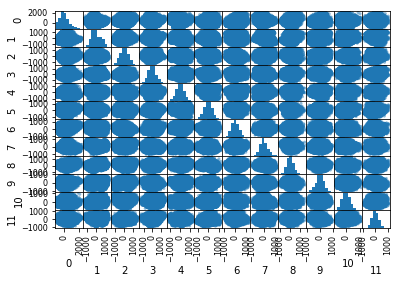

In [87]:
# ax = pd.plotting.scatter_matrix(df_pca10)

In [96]:
from sklearn.cluster import KMeans
kmeans = KMeans(init='k-means++', n_clusters=10)
kmeans.fit(df_pca10.values[:,:n_components])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [97]:
df_pca10['cluster_id'] = kmeans.predict(df_pca10.values[:,:n_components])
df_pca10['digit_id'] = df_train.label
df_pca10.head()


,0,1,2,3,4,5,6,7,8,9,10,11,cluster_id,digit_id
0,123.932591,-312.674261,-24.514111,-555.757975,-27.296606,-232.476839,233.997559,159.820867,-363.484204,198.492075,197.561784,-253.770033,2,5
1,1011.718374,-294.857021,596.339519,-460.766036,-827.275073,-181.951882,-45.005722,-104.953911,40.490995,150.809771,-286.206282,-106.598791,5,0
2,-51.849605,392.173155,-188.509573,521.011158,-306.680101,-1.836350,-859.054303,368.610868,-114.567200,-178.800357,450.644030,-159.452470,3,4
3,-799.127039,-607.197226,273.651230,105.878320,-1.853658,699.655897,-473.716441,-67.358793,302.704112,11.198404,-432.492809,-175.459349,7,1
4,-382.754942,730.542870,16.353840,-241.697527,98.161479,43.229286,-91.667547,-405.565084,225.483082,103.997258,-347.691267,459.352887,6,9


In [98]:
pca2 = PCA(n_components=2).fit(df_train_image)
df_pca2 = pca2.transform(df_train_image)
df_pca2 = pd.DataFrame(df_pca2, columns=list('xy'))
df_pca2['cluster_id'] = kmeans.predict(df_pca10.values[:,:n_components])
df_pca2['digit_id'] = df_train.label
df_pca2.head()


,x,y,cluster_id,digit_id
0,123.934898,-312.674382,2,5
1,1011.718433,-294.856269,5,0
2,-51.846861,392.169030,3,4
3,-799.126197,-607.197119,7,1
4,-382.759441,730.543042,6,9


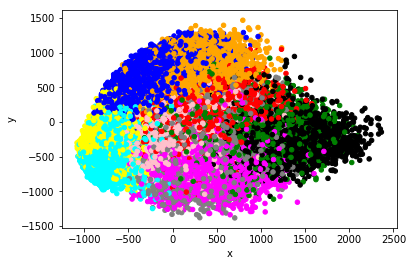

In [99]:
colors = pd.np.array('magenta red pink orange yellow green blue cyan gray black'.split())[df_pca2.cluster_id] 
df_pca2.plot.scatter(x='x', y='y', c=colors)


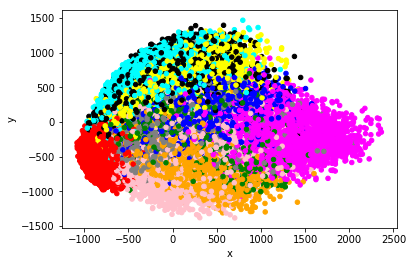

In [100]:
colors = pd.np.array('magenta red pink orange yellow green blue cyan gray black'.split())[df_pca2.digit_id] 
df_pca2.plot.scatter(x='x', y='y', c=colors)

In [101]:
digit2cluster = []
for digit in range(10):
    votes = df_pca2.cluster_id[df_pca2.digit_id == digit].value_counts()
    print()
    print(votes)
    print()
    i = 0
    cluster_id = votes.index[i]
    while cluster_id in digit2cluster:
        cluster_id = votes.index[i]
        i += 1
    digit2cluster.append(cluster_id)



9    3174
5    2159
1     227
0     161
2      91
3      51
8      25
7      14
4      14
6       7
Name: cluster_id, dtype: int64


4    3660
7    3040
2       9
1       8
8       8
6       7
3       5
0       5
Name: cluster_id, dtype: int64


8    4116
4     458
7     351
0     312
3     191
2     179
1     154
5     114
6      60
9      23
Name: cluster_id, dtype: int64


0    3817
2    1045
4     528
5     207
3     174
8     170
7      89
1      45
6      39
9      17
Name: cluster_id, dtype: int64


3    3187
6    1818
7     303
4     227
1     200
8      66
5      16
2      12
9      11
0       2
Name: cluster_id, dtype: int64


0    1694
2    1174
7     671
5     588
4     429
3     398
6     288
1      95
9      73
8      11
Name: cluster_id, dtype: int64


1    4441
4     491
8     432
5     175
7     138
3     101
9      70
2      42
0      27
6       1
Name: cluster_id, dtype: int64


6    3582
3    1857
4     455
7     276
8      40
9      18
2      15
5      14
0       

In [102]:
digit2cluster

[9, 4, 8, 0, 3, 2, 1, 6, 7, 5]

In [103]:
df_pca2['predicted_digit'] = [digit2cluster.index(cid) for cid in df_pca2.cluster_id]

In [104]:
accuracy = (df_pca2.predicted_digit == df_pca2.digit_id).sum() / len(df_pca2)
accuracy

0.46008333333333334

In [105]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced')
lr.fit(df_pca10.values[:,:n_components], df_pca10.digit_id)
df_pca2['lr_predicted_digit'] = lr.predict(df_pca10.values[:,:n_components])

In [106]:
lr.score(df_pca10.values[:,:n_components], df_pca10.digit_id)

0.79863333333333331

In [107]:
(df_pca2.lr_predicted_digit == df_pca2.digit_id).sum() / len(df_pca2)

0.79863333333333331